### Importing Libraries 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
from keras.models import Model, Sequential
from tensorflow.keras.optimizers import RMSprop
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Input, Subtract, Lambda, Dropout
from keras.optimizers import Adam, SGD
from keras.utils.np_utils import to_categorical
from keras.regularizers import l2

### Loading and Processing Data

In [3]:
train_set = pd.read_csv('dataset/train.csv')
validation_set = pd.read_csv('dataset/validation.csv')
X = train_set.iloc[:, 1:].values
y = train_set.iloc[:, 0].values
validation_vals = validation_set.iloc[:, :].values


In [4]:
print(X.shape)
print(validation_vals.shape)

(42000, 784)
(28000, 784)


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 1)

In [6]:
print(X_train.shape)
print(X_test.shape)

(37800, 784)
(4200, 784)


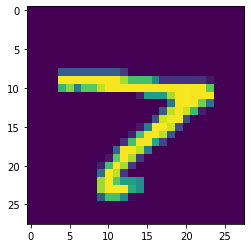

In [7]:
plt.imshow(X_train[0].reshape(28,28))

In [8]:
X_train = X_train.reshape(X_train.shape[0], 28, 28)
X_test = X_test.reshape(X_test.shape[0], 28, 28)
print(X_train.shape)
print(X_test.shape)

(37800, 28, 28)
(4200, 28, 28)


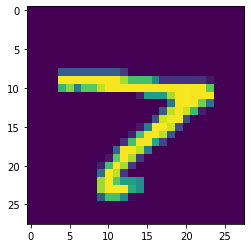

In [9]:
plt.imshow(X_train[0])

In [10]:
X_train = np.expand_dims(X_train, axis=3)
X_test = np.expand_dims(X_test, axis=3)
print(X_train.shape)
print(X_test.shape)

(37800, 28, 28, 1)
(4200, 28, 28, 1)


In [11]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,		
    rotation_range=20,
	zoom_range=0.15,
	width_shift_range=0.2,
	height_shift_range=0.2,
	shear_range=0.15,
	horizontal_flip=True,
	fill_mode="nearest")
validation_datagen = ImageDataGenerator(rescale = 1./255)

### Training Model

In [17]:
batch_size = 200
epochs = 80

### Model 1 - 2 Conv Layers

In [58]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
    ])
# model.summary()

model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])

history = model.fit_generator(train_datagen.flow(X_train, y_train, batch_size=batch_size),
                              steps_per_epoch=len(X_train) / batch_size,
                              epochs=epochs,
                              validation_data=validation_datagen.flow(X_test, y_test, batch_size=batch_size),
                              validation_steps=len(X_test) / batch_size)


Epoch 1/20
378/378 [==============================] - 2s 5ms/step - loss: 0.2329 - accuracy: 0.9303 - val_loss: 0.0889 - val_accuracy: 0.9743
Epoch 2/20
378/378 [==============================] - 2s 5ms/step - loss: 0.0588 - accuracy: 0.9819 - val_loss: 0.0646 - val_accuracy: 0.9798
Epoch 3/20
378/378 [==============================] - 2s 5ms/step - loss: 0.0394 - accuracy: 0.9875 - val_loss: 0.0503 - val_accuracy: 0.9855
Epoch 4/20
378/378 [==============================] - 2s 5ms/step - loss: 0.0300 - accuracy: 0.9907 - val_loss: 0.0422 - val_accuracy: 0.9864
Epoch 5/20
378/378 [==============================] - 2s 5ms/step - loss: 0.0215 - accuracy: 0.9931 - val_loss: 0.0434 - val_accuracy: 0.9867
Epoch 6/20
378/378 [==============================] - 2s 5ms/step - loss: 0.0190 - accuracy: 0.9936 - val_loss: 0.0497 - val_accuracy: 0.9860
Epoch 7/20
378/378 [==============================] - 2s 5ms/step - loss: 0.0153 - accuracy: 0.9952 - val_loss: 0.0472 - val_accuracy: 0.9874
Epoch 

[16.051408767700195, 0.9866666793823242]

### Model 2 - 4 Conv Layers 

In [16]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
    ])
# model.summary()

model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])

history = model.fit_generator(train_datagen.flow(X_train, y_train, batch_size=batch_size),
                              steps_per_epoch=len(X_train) / batch_size,
                              epochs=epochs,
                              validation_data=validation_datagen.flow(X_test, y_test, batch_size=batch_size),
                              validation_steps=len(X_test) / batch_size)


Epoch 1/36
152/151 [==============================] - 3s 17ms/step - loss: 0.3218 - accuracy: 0.9023 - val_loss: 0.0969 - val_accuracy: 0.9702
Epoch 2/36
152/151 [==============================] - 2s 16ms/step - loss: 0.0705 - accuracy: 0.9779 - val_loss: 0.0742 - val_accuracy: 0.9757
Epoch 3/36
152/151 [==============================] - 2s 16ms/step - loss: 0.0455 - accuracy: 0.9856 - val_loss: 0.0510 - val_accuracy: 0.9838
Epoch 4/36
152/151 [==============================] - 2s 16ms/step - loss: 0.0345 - accuracy: 0.9892 - val_loss: 0.0487 - val_accuracy: 0.9848
Epoch 5/36
152/151 [==============================] - 2s 16ms/step - loss: 0.0292 - accuracy: 0.9908 - val_loss: 0.0418 - val_accuracy: 0.9864
Epoch 6/36
152/151 [==============================] - 2s 16ms/step - loss: 0.0251 - accuracy: 0.9915 - val_loss: 0.0350 - val_accuracy: 0.9876
Epoch 7/36
152/151 [==============================] - 2s 16ms/step - loss: 0.0172 - accuracy: 0.9943 - val_loss: 0.0441 - val_accuracy: 0.9857

### Model 3 - 4 Conv Layers 

In [14]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
    ])
# model.summary()

model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])

history = model.fit_generator(train_datagen.flow(X_train, y_train, batch_size=batch_size),
                              steps_per_epoch=len(X_train) / batch_size,
                              epochs=epochs,
                              validation_data=validation_datagen.flow(X_test, y_test, batch_size=batch_size),
                              validation_steps=len(X_test) / batch_size)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
189/189 [==============================] - 7s 38ms/step - loss: 0.9628 - accuracy: 0.6697 - val_loss: 0.2172 - val_accuracy: 0.9362
Epoch 2/30
189/189 [==============================] - 7s 37ms/step - loss: 0.3502 - accuracy: 0.8892 - val_loss: 0.1102 - val_accuracy: 0.9650
Epoch 3/30
189/189 [==============================] - 7s 37ms/step - loss: 0.2392 - accuracy: 0.9245 - val_loss: 0.0860 - val_accuracy: 0.9738
Epoch 4/30
189/189 [==============================] - 7s 37ms/step - loss: 0.1884 - accuracy: 0.9415 - val_loss: 0.0701 - val_accuracy: 0.9771
Epoch 5/30
189/189 [==============================] - 7s 37ms/step - loss: 0.1609 - accuracy: 0.9498 - val_loss: 0.0630 - val_accuracy: 0.9793
Epoch 6/30
189/189 [==============================] - 7s 37ms/step - loss: 0.1378 - accuracy: 0.9563 - val_loss: 0.0728 - val_accuracy: 0.9771
Epoch 7/30
189/189 [==============================] - 7s 37ms/step

### Model 4 - 6 Conv Layers 

In [18]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', input_shape=(28, 28, 1), padding='Same'),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', padding='Same'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', padding='Same'),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', padding='Same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
    ])
# model.summary()

model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])

history = model.fit_generator(train_datagen.flow(X_train, y_train, batch_size=batch_size),
                              steps_per_epoch=len(X_train) / batch_size,
                              epochs=epochs,
                              validation_data=validation_datagen.flow(X_test, y_test, batch_size=batch_size),
                              validation_steps=len(X_test) / batch_size)

Epoch 1/80
189/189 [==============================] - 9s 46ms/step - loss: 0.9913 - accuracy: 0.6533 - val_loss: 0.2475 - val_accuracy: 0.9181
Epoch 2/80
189/189 [==============================] - 9s 48ms/step - loss: 0.3544 - accuracy: 0.8884 - val_loss: 0.1407 - val_accuracy: 0.9560
Epoch 3/80
189/189 [==============================] - 9s 45ms/step - loss: 0.2268 - accuracy: 0.9284 - val_loss: 0.0843 - val_accuracy: 0.9738
Epoch 4/80
189/189 [==============================] - 9s 45ms/step - loss: 0.1729 - accuracy: 0.9454 - val_loss: 0.0933 - val_accuracy: 0.9714
Epoch 5/80
189/189 [==============================] - 9s 45ms/step - loss: 0.1438 - accuracy: 0.9552 - val_loss: 0.0902 - val_accuracy: 0.9719
Epoch 6/80
189/189 [==============================] - 9s 45ms/step - loss: 0.1330 - accuracy: 0.9596 - val_loss: 0.0556 - val_accuracy: 0.9819
Epoch 7/80
189/189 [==============================] - 9s 45ms/step - loss: 0.1160 - accuracy: 0.9634 - val_loss: 0.0510 - val_accuracy: 0.9843

In [14]:
model.evaluate(validation_datagen.flow(X_test, y_test, batch_size=batch_size), verbose=1)

21/21 [==============================] - 0s 15ms/step - loss: 0.0415 - accuracy: 0.9850


[0.0414658784866333, 0.9850000143051147]

### Plotting Learning Curves

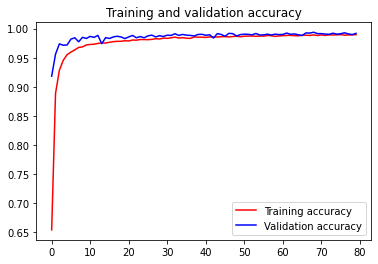

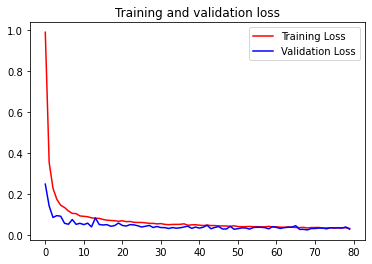

In [19]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [20]:
model.save('models/kaggle_digit_recognizer_model_4_da_80eps.h5')

In [48]:
model = tf.keras.models.load_model('models/kaggle_digit_recognizer_model_4_da.h5')

In [21]:
model.evaluate(validation_datagen.flow(X_train, (y_train), batch_size=batch_size), verbose=1)

189/189 [==============================] - 3s 16ms/step - loss: 0.0159 - accuracy: 0.9946


[0.0158504918217659, 0.9945766925811768]

In [22]:
validation_vals = validation_vals.reshape(validation_vals.shape[0], 28, 28)
print(validation_vals.shape)
validation_vals = np.expand_dims(validation_vals, axis=3)
print(validation_vals.shape)

(28000, 28, 28)
(28000, 28, 28, 1)


In [23]:
validation_vals = validation_vals.astype('float64')

In [24]:
validation_vals *= 255.0/validation_vals.max()

In [25]:
val_pred = model.predict(validation_vals)

In [26]:
np.argmax(val_pred[1])

0

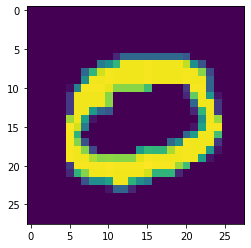

In [27]:
plt.imshow(validation_vals[1])

In [28]:
y_test_out = np.zeros((val_pred.shape[0], 2),dtype = int)
for i in range(len(val_pred)):
    y_test_out[i][0] = int(i+1)
    y_test_out[i][1] = int(np.argmax(val_pred[i]))

In [29]:
y_test_out.shape

(28000, 2)

In [30]:
ydf = pd.DataFrame(y_test_out, columns=['ImageId', 'Label'])
ydf.to_csv('output/output_model_4_da.csv',index = False)

In [29]:
print(type(y_test_out[0][1]))

<class 'numpy.int32'>
